# <span style="color:darkblue"> QTM 151 - Assignment 10 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [ ]:
# Write your answer here

print('Tomas Hossain-Aguilar')


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [1]:
# Write your answer here
import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

In this assigment you will work with data on exchange rates, <br>
for two currencies:

- 1 dollar (USD) to chinese yuan (RMB)
- 1 dollar (USD) to japanese yen (JPY).

For this lecture, you will need the material from <br>
Lecture 20 and 22.


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "exchangerates.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [12]:
# Write your own code
exchange = pd.read_csv("data_raw/exchangerates.csv")
exchange["date"] = pd.to_datetime(exchange['date_string'], format = "%Y, %A, %b %d")

exchange

,date_string,usd_to_rmb,usd_to_jpy,date
0,"1981, Friday, Jan 02",1.5341,202.50,1981-01-02
1,"1981, Monday, Jan 05",1.5418,199.05,1981-01-05
2,"1981, Tuesday, Jan 06",1.5264,199.70,1981-01-06
3,"1981, Wednesday, Jan 07",1.5264,201.05,1981-01-07
4,"1981, Thursday, Jan 08",1.5264,201.70,1981-01-08
...,...,...,...,...
11016,"2023, Monday, Mar 27",6.8834,131.49,2023-03-27
11017,"2023, Tuesday, Mar 28",6.8725,130.97,2023-03-28
11018,"2023, Wednesday, Mar 29",6.8862,132.69,2023-03-29
11019,"2023, Thursday, Mar 30",6.8700,132.71,2023-03-30


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "usd_to_rmb" and "usd_to_jpy" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 USD to RMB" and "1 USD to JPY"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


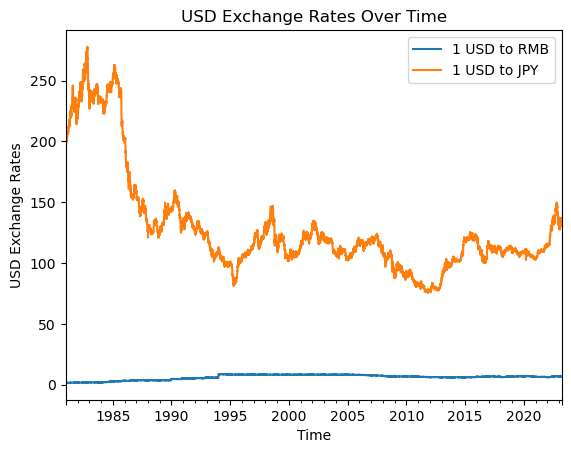

In [19]:
# Write your own code
exchange[["date","usd_to_rmb","usd_to_jpy"]].set_index("date").plot()
plt.legend(["1 USD to RMB","1 USD to JPY"])
plt.xlabel("Time")
plt.ylabel("USD Exchange Rates")
plt.title("USD Exchange Rates Over Time")
plt.show()

<font size = "5">

(c) Flag subset of data and plot

<font size = "3">

- Create a boolean vector (True/False) "bool_cond" which checks whether <br>
"usd_to_jpy" is below 100
- Generate a line plot with the "usd_to_jpy" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



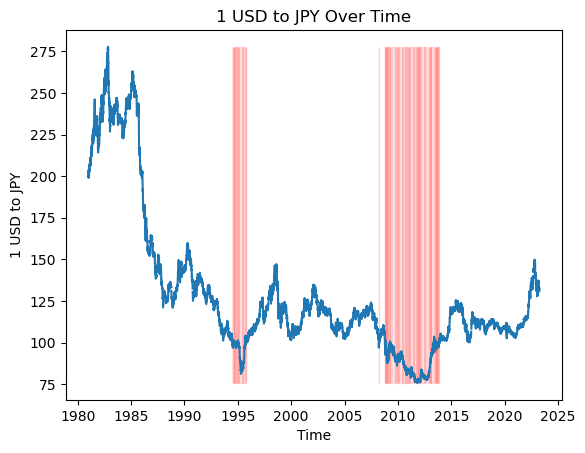

In [30]:
# Write your own code
exchange['bool_cond'] = exchange['usd_to_jpy'] < 100

plt.plot("date", "usd_to_jpy", data=exchange)
plt.xlabel("Time")
plt.ylabel("1 USD to JPY")
plt.title("1 USD to JPY Over Time")

plt.fill_between(x = exchange["date"],
                 y1 = exchange['usd_to_jpy'].min(),
                 y2 = exchange['usd_to_jpy'].max(),
                 where = exchange["bool_cond"],
                 alpha = 0.1,
                 color = "red")


<font size = "5">

(d) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "usd_to_rmb"
- Display the dataset




In [32]:
# Write your own code
month_config = pd.Grouper(key='date', freq='y')

monthlystd = (exchange
               .groupby(month_config)
               .agg(usd_to_rmb_stdv = ("usd_to_rmb","std"))
               .reset_index())

monthlystd

,date,usd_to_rmb_stdv
0,1981-12-31,0.073751
1,1982-12-31,0.072630
2,1983-12-31,0.022130
3,1984-12-31,0.258017
4,1985-12-31,0.137113
5,1986-12-31,0.255471
6,1987-12-31,0.000000
7,1988-12-31,0.000000
8,1989-12-31,0.186769
9,1990-12-31,0.160845


<font size = "5">

(e) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["usd_to_rmb","usd_to_jpy"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [36]:
# Write your own code
exchange_long = (pd.melt(exchange,
                         var_name = "type",
                         value_name = "exchange_rate",
                         id_vars = "date",
                         value_vars = ["usd_to_rmb","usd_to_jpy"]))

exchange_long

,date,type,exchange_rate
0,1981-01-02,usd_to_rmb,1.5341
1,1981-01-05,usd_to_rmb,1.5418
2,1981-01-06,usd_to_rmb,1.5264
3,1981-01-07,usd_to_rmb,1.5264
4,1981-01-08,usd_to_rmb,1.5264
...,...,...,...
22037,2023-03-27,usd_to_jpy,131.4900
22038,2023-03-28,usd_to_jpy,130.9700
22039,2023-03-29,usd_to_jpy,132.6900
22040,2023-03-30,usd_to_jpy,132.7100
